In [17]:
# Import required libraries into the jupyter notebook

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from sqlite3 import connect
conn = connect(':memory:')


Beginning Code blocks to do the things I want it to do

In [18]:
# Step to read in weather data and pizza data csv files from the data directory
weather_file = pd.read_csv("data/alexandria_weather_data.csv", low_memory=False)
pizza_file = pd.read_csv("data/alexandria_pizza_data.csv", low_memory=False)


In [19]:
# Display head of weather file to show successful read of file
weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,42,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,33,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,44,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,41,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,35,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [20]:
# Diesply head of pizza date file to show successful read of file
pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,OrdVoidDate,OrdTaxExemptID,OrdOnlineOrderID,PmtType
0,3/1/2021,Monday,3,19.60,1,NaN,NaN,NaN,3
1,3/1/2021,Monday,2,20.74,3,NaN,NaN,NaN,3
2,3/1/2021,Monday,5,20.97,1,NaN,NaN,NaN,3
3,3/1/2021,Monday,6,9.99,1,NaN,NaN,NaN,3
4,3/1/2021,Monday,10,26.27,1,NaN,NaN,NaN,3


In [21]:
# Add steps in here to round the temp to the nearest ten degrees

weather_file.temp = weather_file.temp.round(-1) 
weather_file.precip = weather_file.precip.round(2)
weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,40,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,30,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,40,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,40,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,40,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [22]:
# Cleaning data ahead of the merge since there were column warnings above

pizza_file.drop(['OrdVoidDate', 'OrdTaxExemptID', 'OrdOnlineOrderID', 'PmtType'],axis=1,inplace=True)
weather_file.drop(['name', 'icon', 'stations', 'sunrise', 'sunset', 'moonphase', 'description'],axis=1,inplace=True)

pizza_file
#pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType
0,3/1/2021,Monday,3,19.60,1
1,3/1/2021,Monday,2,20.74,3
2,3/1/2021,Monday,5,20.97,1
3,3/1/2021,Monday,6,9.99,1
4,3/1/2021,Monday,10,26.27,1
...,...,...,...,...,...
93481,10/31/2023,Tuesday,173,10.49,1
93482,10/31/2023,Tuesday,25,64.69,1
93483,10/31/2023,Tuesday,122,23.98,1
93484,10/31/2023,Tuesday,155,19.98,1


In [23]:
pizza_file['BusDate'] = pd.to_datetime(pizza_file['BusDate'])
weather_file['datetime'] = pd.to_datetime(weather_file['datetime'])
pizza_file

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType
0,2021-03-01,Monday,3,19.60,1
1,2021-03-01,Monday,2,20.74,3
2,2021-03-01,Monday,5,20.97,1
3,2021-03-01,Monday,6,9.99,1
4,2021-03-01,Monday,10,26.27,1
...,...,...,...,...,...
93481,2023-10-31,Tuesday,173,10.49,1
93482,2023-10-31,Tuesday,25,64.69,1
93483,2023-10-31,Tuesday,122,23.98,1
93484,2023-10-31,Tuesday,155,19.98,1


In [24]:
weather_file.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions
0,2021-03-01,55,32,40,55.0,23.9,35.3,28.8,62.0,0.03,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
1,2021-03-02,44,24,30,44.4,16.6,28.6,16.5,52.2,0.00,...,8.9,49.6,1026.0,0.5,9.9,197.2,17.1,7,NaN,Clear
2,2021-03-03,62,27,40,62.1,22.7,42.2,26.6,54.2,0.00,...,13.6,232.9,1017.5,0.0,9.9,194.3,16.6,7,NaN,Clear
3,2021-03-04,52,30,40,51.9,23.2,36.7,25.9,57.3,0.00,...,16.4,358.6,1021.9,1.3,9.9,197.0,16.9,7,NaN,Clear
4,2021-03-05,47,25,40,42.2,18.4,31.0,18.9,54.5,0.00,...,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN,Clear


In [25]:
# Joining both files into one data element to begin analysis
#left = pizza_file.set_index('BusDate')
#right = weather_file.set_index('datetime')
#combined_dataset = left.join(right, lsuffix='_p', rsuffix="_w")

combined_dataset = pizza_file.merge(weather_file, how='left', left_on="BusDate", right_on='datetime', suffixes=('_x', '_y'))

#Reading dataframe into SQL
combined_dataset.to_sql(name='combined_db', con=conn)
pizza_file.to_sql(name='pizza_db', con=conn)
weather_file.to_sql(name='weather_db', con=conn)

# Displaying combined dataset to ensure it created properly
combined_dataset.head()



,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions
0,2021-03-01,Monday,3,19.60,1,2021-03-01,55,32,40,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
1,2021-03-01,Monday,2,20.74,3,2021-03-01,55,32,40,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
2,2021-03-01,Monday,5,20.97,1,2021-03-01,55,32,40,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
3,2021-03-01,Monday,6,9.99,1,2021-03-01,55,32,40,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
4,2021-03-01,Monday,10,26.27,1,2021-03-01,55,32,40,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"


In [26]:
# Creating a dataset to use for correlation
corr_dataset = pizza_file.merge(weather_file, how='left', left_on="BusDate", right_on='datetime')
corr_dataset.drop(['DayofWeek','conditions','preciptype'],axis=1,inplace=True)

corr_dataset.head()

,BusDate,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
0,2021-03-01,3,19.60,1,2021-03-01,55,32,40,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
1,2021-03-01,2,20.74,3,2021-03-01,55,32,40,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
2,2021-03-01,5,20.97,1,2021-03-01,55,32,40,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
3,2021-03-01,6,9.99,1,2021-03-01,55,32,40,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
4,2021-03-01,10,26.27,1,2021-03-01,55,32,40,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN


In [27]:
# This cell will be used to try to sample the data and show various counts

orders_per_avgtemp = combined_dataset.temp.value_counts()
orders_per_avgtemp

temp
70    23761
60    17951
80    14784
50    14123
40    14014
30     6726
20     1927
10      124
0        76
Name: count, dtype: int64

In [28]:
orders_per_precip = combined_dataset.precip.value_counts()
orders_per_precip.to_csv("data/OrdersPrecip.csv")
orders_per_precip

precip
0.00    57199
0.01     5123
0.02     2846
0.04     1675
0.07     1390
        ...  
0.73       62
0.29       62
1.37       58
0.54       53
0.84       50
Name: count, Length: 87, dtype: int64

In [29]:
# This cell will be used to try to sample the data and show various counts

orders_per_maxtemp = combined_dataset.tempmax.value_counts()
orders_per_maxtemp

tempmax
82    3473
83    3260
84    3133
78    2923
75    2748
      ... 
17     138
29     128
24     128
30     119
14      76
Name: count, Length: 72, dtype: int64

In [30]:
# This cell will be used to try to sample the data and show various counts

orders_per_mintemp = combined_dataset.tempmin.value_counts()
orders_per_mintemp

tempmin
 59    3101
 62    2932
 57    2871
 70    2722
 64    2453
       ... 
 10     138
 76     132
 3      124
-7       76
 6       66
Name: count, Length: 69, dtype: int64

In [31]:
# This cell will be used to try to sample the data and show various counts

orders_per_day = combined_dataset.DayofWeek.value_counts()
orders_per_day

DayofWeek
Friday       20113
Saturday     18462
Sunday       13451
Thursday     11603
Wednesday    10712
Tuesday       9945
Monday        9200
Name: count, dtype: int64

In [32]:
# Creating dataframes for weekend and M-Th pizza sales 

# Weekend
friday_select = (combined_dataset.DayofWeek == 'Friday')
friday_orders = combined_dataset[friday_select]
saturday_select = (combined_dataset.DayofWeek == 'Saturday')
saturday_orders = combined_dataset[saturday_select]
sunday_select = (combined_dataset.DayofWeek == 'Sunday')
sunday_orders = combined_dataset[sunday_select]
weekend_orders = pd.concat([friday_orders, saturday_orders, sunday_orders])

# Weekday
monday_select = (combined_dataset.DayofWeek == "Monday")
monday_orders = combined_dataset[monday_select]
tuesday_select = (combined_dataset.DayofWeek == "Tuesday")
tuesday_orders = combined_dataset[tuesday_select]
wednesday_select = (combined_dataset.DayofWeek == "Wednesday")
wednesday_orders = combined_dataset[wednesday_select]
thursday_select = (combined_dataset.DayofWeek == "Thursday")
thursday_orders = combined_dataset[thursday_select]
montues_orders = pd.concat([monday_orders, tuesday_orders])
weekday_orders = pd.concat([monday_orders, tuesday_orders, wednesday_orders, thursday_orders])

In [33]:
weekend_orders

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions
267,2021-03-05,Friday,1,28.86,1,2021-03-05,47,25,40,42.2,...,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN,Clear
268,2021-03-05,Friday,2,24.98,3,2021-03-05,47,25,40,42.2,...,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN,Clear
269,2021-03-05,Friday,4,23.97,1,2021-03-05,47,25,40,42.2,...,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN,Clear
270,2021-03-05,Friday,5,17.58,1,2021-03-05,47,25,40,42.2,...,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN,Clear
271,2021-03-05,Friday,7,20.12,3,2021-03-05,47,25,40,42.2,...,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93243,2023-10-29,Sunday,122,25.98,1,2023-10-29,60,54,60,59.6,...,8.5,339.8,1016.5,99.6,6.2,7.9,0.6,1,10.0,"Rain, Overcast"
93244,2023-10-29,Sunday,78,32.57,1,2023-10-29,60,54,60,59.6,...,8.5,339.8,1016.5,99.6,6.2,7.9,0.6,1,10.0,"Rain, Overcast"
93245,2023-10-29,Sunday,108,22.42,1,2023-10-29,60,54,60,59.6,...,8.5,339.8,1016.5,99.6,6.2,7.9,0.6,1,10.0,"Rain, Overcast"
93246,2023-10-29,Sunday,109,11.48,1,2023-10-29,60,54,60,59.6,...,8.5,339.8,1016.5,99.6,6.2,7.9,0.6,1,10.0,"Rain, Overcast"


In [34]:
weekday_orders

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions
0,2021-03-01,Monday,3,19.60,1,2021-03-01,55,32,40,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
1,2021-03-01,Monday,2,20.74,3,2021-03-01,55,32,40,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
2,2021-03-01,Monday,5,20.97,1,2021-03-01,55,32,40,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
3,2021-03-01,Monday,6,9.99,1,2021-03-01,55,32,40,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
4,2021-03-01,Monday,10,26.27,1,2021-03-01,55,32,40,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92834,2023-10-26,Thursday,102,33.96,2,2023-10-26,77,53,60,76.5,...,15.4,210.6,1022.0,41.3,9.0,36.1,3.1,2,10.0,Partially cloudy
92835,2023-10-26,Thursday,64,19.98,1,2023-10-26,77,53,60,76.5,...,15.4,210.6,1022.0,41.3,9.0,36.1,3.1,2,10.0,Partially cloudy
92836,2023-10-26,Thursday,67,27.92,1,2023-10-26,77,53,60,76.5,...,15.4,210.6,1022.0,41.3,9.0,36.1,3.1,2,10.0,Partially cloudy
92837,2023-10-26,Thursday,98,19.46,1,2023-10-26,77,53,60,76.5,...,15.4,210.6,1022.0,41.3,9.0,36.1,3.1,2,10.0,Partially cloudy


In [35]:
# Checking the correlation of temperature on Weekend days

#fri_orders_per_avgtemp = friday_orders.temp.value_counts()
#fri_orders_per_avgtemp

montues_orders_per_avgtemp = montues_orders.temp.value_counts().rename("numcount")
montues_orders_per_avgtemp

temp
70    4956
60    3498
50    3115
80    3036
40    2571
30    1657
20     312
Name: numcount, dtype: int64

In [36]:
# Correlation matrix for the combined dataframe

print(corr_dataset.corr())

corr_output = corr_dataset.corr()

# corr_output.to_csv("data/CorrResults.csv")  # Commenting this out since it is no longer required.
#corr_matrix

#Correlation matrix first try did not work - need to dig into previous class examples and find this to see if I can figure this out. Ending for the day
# Second try got closer - maybe try removing the dayofthe week column and try that.
# Third try worked by removing the columns with words

 #Working thoughts - What does order type/money spent tell us?, What about rounding precip and seeing number of orders based on amount of precip
 # Trend seems to show that the more it rains, the less people order pizza

                   BusDate   OrderID  OtotSubTotal  OrdServiceType  datetime  \
BusDate           1.000000  0.015641      0.066150        0.046592  1.000000   
OrderID           0.015641  1.000000     -0.023917       -0.021448  0.015641   
OtotSubTotal      0.066150 -0.023917      1.000000       -0.119115  0.066150   
OrdServiceType    0.046592 -0.021448     -0.119115        1.000000  0.046592   
datetime          1.000000  0.015641      0.066150        0.046592  1.000000   
tempmax           0.055622 -0.027196     -0.005950       -0.013141  0.055622   
tempmin           0.041289 -0.025703     -0.009350       -0.013401  0.041289   
temp              0.050492 -0.023115     -0.006052       -0.012452  0.050492   
feelslikemax      0.045923 -0.027417     -0.007108       -0.012938  0.045923   
feelslikemin      0.041461 -0.027392     -0.009434       -0.013844  0.041461   
feelslike         0.045547 -0.028333     -0.008123       -0.013236  0.045547   
dew               0.055314 -0.022437    

In [37]:
corr_dataset.head()

,BusDate,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
0,2021-03-01,3,19.60,1,2021-03-01,55,32,40,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
1,2021-03-01,2,20.74,3,2021-03-01,55,32,40,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
2,2021-03-01,5,20.97,1,2021-03-01,55,32,40,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
3,2021-03-01,6,9.99,1,2021-03-01,55,32,40,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
4,2021-03-01,10,26.27,1,2021-03-01,55,32,40,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN


In [38]:
# First visualizations from the dataframes I have created
# First up is orders per day. 
#orders_per_day.plot.bar()
#orders_per_avgtemp.plot(kind="bar")
#orders_per_precip.plot() - does not work

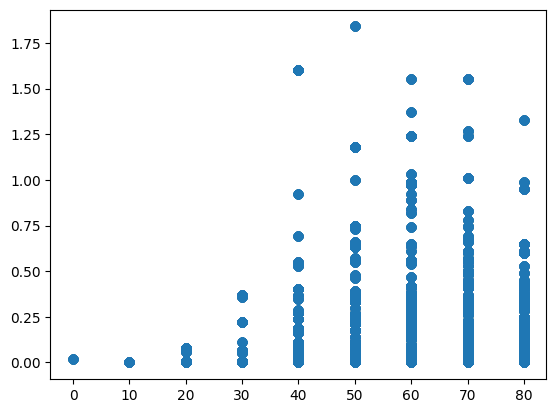

In [39]:
x=combined_dataset["temp"]
y=combined_dataset["precip"]
plt.scatter(x,y)

In [40]:
# Weekday
#monday_select = (combined_dataset.DayofWeek == "Monday")
#monday_orders = combined_dataset[monday_select]
#tuesday_select = (combined_dataset.DayofWeek == "Tuesday")
#tuesday_orders = combined_dataset[tuesday_select]
#wednesday_select = (combined_dataset.DayofWeek == "Wednesday")
##wednesday_orders = combined_dataset[wednesday_select]
#thursday_select = (combined_dataset.DayofWeek == "Thursday")
#thursday_orders = combined_dataset[thursday_select]
#montues_orders = pd.concat([monday_orders, tuesday_orders])
#weekday_orders = pd.concat([monday_orders, tuesday_orders, wednesday_orders, thursday_orders])


# stopping point for today - need to setup dataframe to hold columns of information I want to visualize - 7 wide bar chart for pizza sales per precipitation
# or pizza sales per temperature - probably both.

<Axes: >

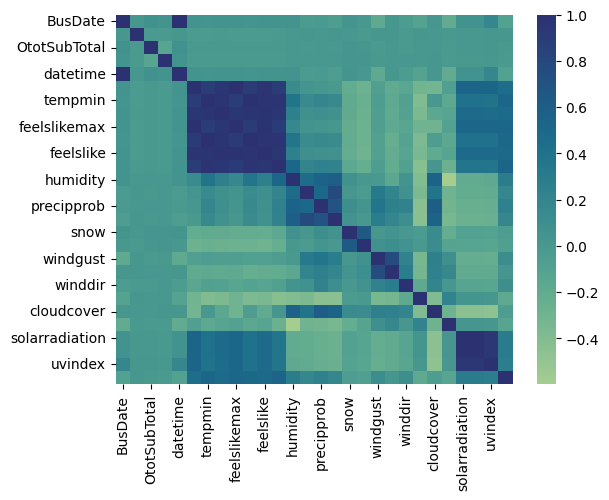

In [41]:
sns.heatmap(corr_output, cmap='crest')

In [42]:
#Example from seaborn docs
#glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
#sns.heatmap(glue)

#dayofweek_weather = sns.load_dataset("combined_dataset").pivot(index="Test", columns="DayofWeek", values="OrderID")
sns.heatmap(corr_dataset)





TypeError: float() argument must be a string or a real number, not 'Timestamp'

<Axes: >

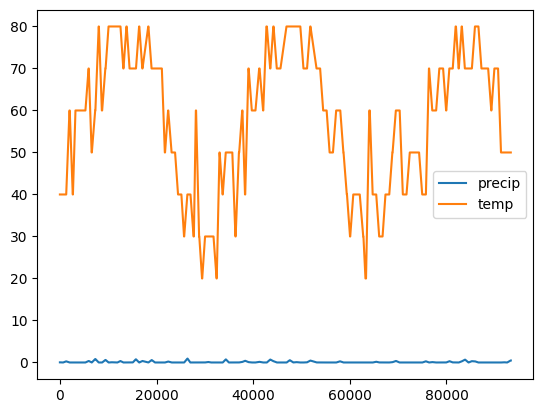

In [43]:
monday_orders_graph = monday_orders[["DayofWeek","precip","temp"]]
monday_orders_graph.reset_index(drop=True)
monday_orders_graph.plot()

<Axes: xlabel='BusDate'>

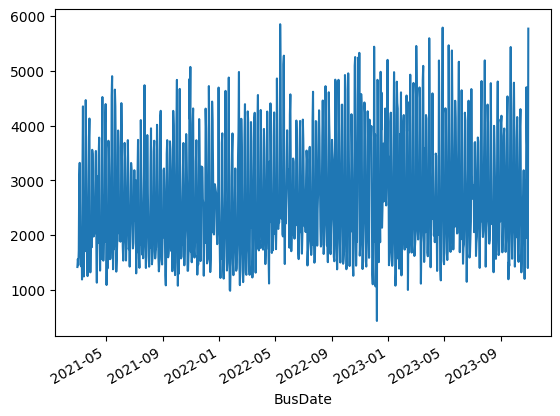

In [52]:
# Trying to sum transactions for the day to eventually show sales per day in a line graph

#combined_dataset.groupby('OtotSubTotal').max()
sales_total_day = combined_dataset.groupby('BusDate')['OtotSubTotal'].sum()
sales_total_day.plot()


<Axes: >

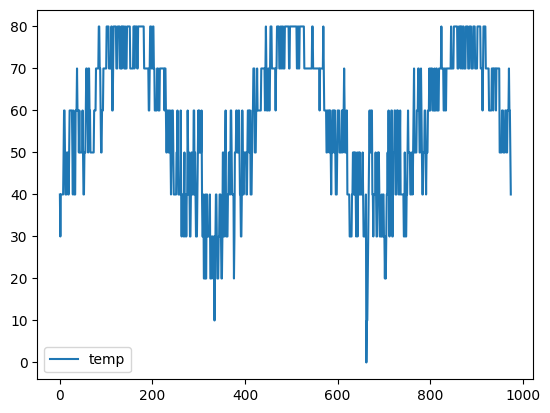

In [45]:
db_df = pd.read_sql('select datetime, temp from weather_db', conn)
db_df.plot()

<Axes: >

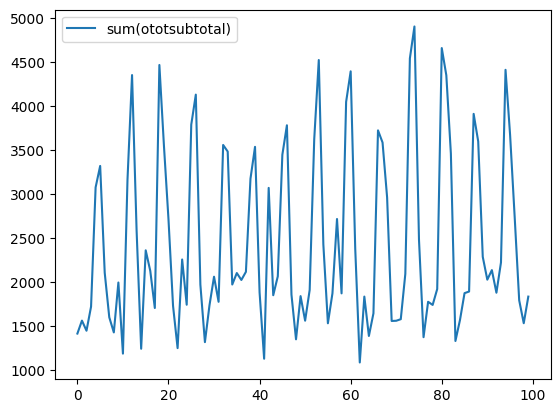

In [46]:
sales_df = pd.read_sql('select busdate, sum(ototsubtotal) from pizza_db group by busdate limit 100', conn)
sales_df.plot()

In [ ]:
#Notes for next time..  pd.groupby finally worked so I have sorted for daily sales from pandas and sql.
#Need to continue building a combined dataframe with temp and precip to see if I can get things on 1 line graph
#Alternate graphs would be to split sales in day and then plot each day on a graph